# Bit flipping game with DQN solver

This is the implementation of the DQN solver for the bit flipping game in [**Hindsight Experience Replay**](https://arxiv.org/abs/1707.01495).

**Rerefence**:

1. Marcin Andrychowicz, Filip Wolski, Alex Ray, Jonas Schneider, Rachel Fong, Peter Welinder, Bob McGrew, Josh Tobin, Pieter Abbeel, Wojciech Zaremba, Hindsight Experience Replay


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from bitflipping import bitflipping as bf
from DQN import DQN

plt.rcParams['figure.figsize'] = [15, 20]
%matplotlib inline

## Set up the bit flipping game environment

In [2]:
init_state = np.array([0,1])
goal = np.ones((2,))
n = 4
bf_env = bf(init_state, goal, n)

## Build up the DQN neural network

In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=(None, 2*n))
y = tf.placeholder(tf.float32, shape=(None, 1))


hid = [256]
agent = DQN(x, hid, n, discount=0.98, eps=1, annealing=0.8, tau = 0.95, replay_buffer_size=1e5, batch_size=32)

In [4]:
losses, success_all = agent.train_Q(x, y, epoch=300, episode=16, iteration=32)

Epoch 0 Episode 31: loss is 0.0522
Epoch 1 Episode 31: loss is 0.0493
Epoch 2 Episode 31: loss is 0.0411
Epoch 3 Episode 31: loss is 0.0318
Epoch 4 Episode 31: loss is 0.0224
Epoch 5 Episode 31: loss is 0.0313
Epoch 6 Episode 31: loss is 0.032
Epoch 7 Episode 31: loss is 0.0197
Epoch 8 Episode 31: loss is 0.0337
Epoch 9 Episode 31: loss is 0.0249
Epoch 10 Episode 31: loss is 0.0047
Epoch 11 Episode 31: loss is 0.034
Epoch 12 Episode 31: loss is 0.0378
Epoch 13 Episode 31: loss is 0.0156
Epoch 14 Episode 31: loss is 0.0253
Epoch 15 Episode 31: loss is 0.023
Epoch 16 Episode 31: loss is 0.0389
Epoch 17 Episode 31: loss is 0.0277
Epoch 18 Episode 31: loss is 0.0114
Epoch 19 Episode 31: loss is 0.0468
Epoch 20 Episode 31: loss is 0.0156
Epoch 21 Episode 31: loss is 0.0191
Epoch 22 Episode 31: loss is 0.0164
Epoch 23 Episode 31: loss is 0.0419
Epoch 24 Episode 31: loss is 0.0356
Epoch 25 Episode 31: loss is 0.0383
Epoch 26 Episode 31: loss is 0.0288
Epoch 27 Episode 31: loss is 0.0265
Epoch

Epoch 230 Episode 31: loss is 0.444
Epoch 231 Episode 31: loss is 0.607
Epoch 232 Episode 31: loss is 0.79
Epoch 233 Episode 31: loss is 0.564
Epoch 234 Episode 31: loss is 0.372
Epoch 235 Episode 31: loss is 0.562
Epoch 236 Episode 31: loss is 0.616
Epoch 237 Episode 31: loss is 0.213
Epoch 238 Episode 31: loss is 0.449
Epoch 239 Episode 31: loss is 0.463
Epoch 240 Episode 31: loss is 0.757
Epoch 241 Episode 31: loss is 0.708
Epoch 242 Episode 31: loss is 0.703
Epoch 243 Episode 31: loss is 0.507
Epoch 244 Episode 31: loss is 0.894
Epoch 245 Episode 31: loss is 0.516
Epoch 246 Episode 31: loss is 0.781
Epoch 247 Episode 31: loss is 0.778
Epoch 248 Episode 31: loss is 0.848
Epoch 249 Episode 31: loss is 0.473
Epoch 250 Episode 31: loss is 0.717
Epoch 251 Episode 31: loss is 0.551
Epoch 252 Episode 31: loss is 0.612
Epoch 253 Episode 31: loss is 0.732
Epoch 254 Episode 31: loss is 0.666
Epoch 255 Episode 31: loss is 0.484
Epoch 256 Episode 31: loss is 0.36
Epoch 257 Episode 31: loss is 

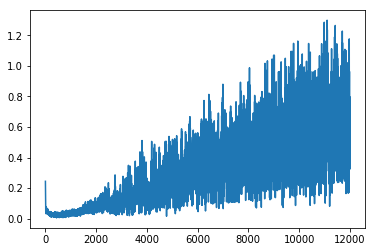

In [5]:
plt.figure()
plt.plot(losses)
plt.show()

## Test DQN

In [6]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, '/tmp/model.ckpt')
    
    success = 0
    for i in range(100):
        
        s_0 = agent._sample_state()
        goal = agent._sample_state()
        while np.array_equal(s_0, goal):
            goal = agent._sample_state()

        env = bf(s_0, goal, n)

        for i in range(n):
            X = np.concatenate((env.state.reshape((1,-1)),goal.reshape((1,-1))), axis=1)
            Q = sess.run(agent.targetModel, feed_dict={x: X})
            action = np.argmax(Q)
            env.update_state(action)
            if (env.reward(env.state)==0):
                print('Success! Initial state:{0}\t Goal state:{1}'.format(s_0, goal))
                success += 1
                break
            elif (i==n-1):
                print('Fail! Initial state:{0}\t Goal state:{1}'.format(s_0, goal))
                
    print('Success rate {}%'.format(success))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Fail! Initial state:[1 1 1 0]	 Goal state:[1 1 0 0]
Success! Initial state:[0 0 1 1]	 Goal state:[1 0 1 1]
Fail! Initial state:[0 1 1 1]	 Goal state:[1 1 0 0]
Fail! Initial state:[1 1 0 0]	 Goal state:[0 0 0 1]
Success! Initial state:[1 0 1 1]	 Goal state:[1 0 0 1]
Fail! Initial state:[0 1 0 1]	 Goal state:[1 0 1 1]
Fail! Initial state:[1 1 1 0]	 Goal state:[0 0 0 0]
Fail! Initial state:[1 1 0 1]	 Goal state:[1 1 1 0]
Fail! Initial state:[1 1 1 0]	 Goal state:[1 1 1 1]
Fail! Initial state:[0 1 0 0]	 Goal state:[1 0 0 1]
Fail! Initial state:[0 0 0 0]	 Goal state:[1 0 0 0]
Fail! Initial state:[0 1 0 1]	 Goal state:[1 0 0 0]
Fail! Initial state:[0 0 0 1]	 Goal state:[1 1 0 0]
Fail! Initial state:[0 0 0 0]	 Goal state:[0 1 1 0]
Fail! Initial state:[1 0 0 1]	 Goal state:[0 0 1 0]
Fail! Initial state:[1 0 0 0]	 Goal state:[0 1 0 1]
Fail! Initial state:[0 1 1 1]	 Goal state:[1 1 0 0]
Fail! Initial state:[1 1 1 1]	 Goal state:[1 0 1 0]


In [7]:
a=np.array([[1,2,3,2,1,3]])

In [8]:
a.shape

(1, 6)

In [9]:
s=np.argmax(a)